# Set the location of where this repository is housed

In [9]:
import sys
sys.path.append("C:/Users/ahaberlie/Documents/GitHub/MCS/")

# Download classified slices from May-September in 2015

Download data.tar.gz from https://tiny.cc/ + the full manuscript ID for part 1 (case sensitive), and untar and ungzip this into the directory "MCS/mcs" and make sure the output folder is "data" and it has a folder named "slice_data". Examine the code to see the proper location if you are getting an error (i.e., "../data/slice_data/")

In [1]:
import pandas as pd

df = pd.DataFrame.from_csv("../data/slice_data/labeled_slices_020618.csv")

df = df[df.major_axis_length >= 100]

df

C:\Users\ahaberlie\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0.1,datetime,Unnamed: 0.1.1,area,conv_buffer,convection_area,convection_stratiform_ratio,convex_area,eccentricity,filename,...,minor_axis_length,solidity,strat_buffer,xmax,xmin,ymax,ymin,CRSR,SSR,mcs_proba
0,0,2015-05-01 00:00:00,0,14720.0,6,2908.0,0.197554,20616.0,0.843152,100_6_48/slices/5/BREF_150501_0000_00000.png,...,107.991190,0.714009,48,2717,2609,734,669,6,48,0.439753
1,1,2015-05-01 00:00:00,1,11428.0,6,2808.0,0.245712,15652.0,0.862554,100_6_48/slices/5/BREF_150501_0000_00001.png,...,94.269337,0.730130,48,2729,2665,1005,912,6,48,0.286128
2,2,2015-05-01 00:15:00,2,11172.0,6,2352.0,0.210526,15196.0,0.859877,100_6_48/slices/5/BREF_150501_0015_00000.png,...,92.654812,0.735193,48,2730,2671,1007,916,6,48,0.255566
3,3,2015-05-01 01:45:00,3,3044.0,6,660.0,0.216820,5052.0,0.984759,100_6_48/slices/5/BREF_150501_0145_00000.png,...,30.203461,0.602534,48,1563,1492,638,595,6,48,0.001463
4,4,2015-05-01 03:45:00,4,11004.0,6,1300.0,0.118139,15480.0,0.688608,100_6_48/slices/5/BREF_150501_0345_00000.png,...,111.893932,0.710853,48,2904,2827,886,813,6,48,0.186368
5,5,2015-05-01 06:30:00,5,6156.0,6,1368.0,0.222222,8708.0,0.974867,100_6_48/slices/5/BREF_150501_0630_00000.png,...,44.107213,0.706936,48,1617,1524,580,537,6,48,0.015263
6,6,2015-05-01 06:45:00,6,5924.0,6,1084.0,0.182984,8236.0,0.973157,100_6_48/slices/5/BREF_150501_0645_00000.png,...,44.502831,0.719281,48,1624,1535,581,538,6,48,0.008078
7,7,2015-05-01 09:00:00,7,11488.0,6,1708.0,0.148677,15756.0,0.692926,100_6_48/slices/5/BREF_150501_0900_00000.png,...,112.262872,0.729119,48,2663,2573,948,887,6,48,0.161678
8,8,2015-05-01 11:00:00,8,4376.0,6,1920.0,0.438757,7900.0,0.988881,100_6_48/slices/5/BREF_150501_1100_00000.png,...,38.909910,0.553924,48,762,711,854,733,6,48,0.027735
9,9,2015-05-01 18:00:00,9,5912.0,6,1288.0,0.217862,9524.0,0.941335,100_6_48/slices/5/BREF_150501_1800_00000.png,...,62.935261,0.620748,48,2810,2724,1007,966,6,48,0.005032


# Calculate basic stats on slices organized by perturbation

In [6]:
import numpy as np

table9 = {'Year':[],
          'CRSR':[],
          'SSR':[],
          'Count_0.00':[],
          'Area_0.00':[],
          'Count_0.50':[],
          'Area_0.50':[],
          'Count_0.90':[],
          'Area_0.90':[],
          'Count_0.95':[],
          'Area_0.95':[]}


for year in [2015, 2016]:
    for crsr in [6, 12, 24, 48]:
        for ssr in [48, 96, 192]:

            table9['Year'].append(year)
            table9['CRSR'].append(crsr)
            table9['SSR'].append(ssr)
            

            t_df = df[(df.CRSR==crsr) & (df.SSR==ssr) & (pd.to_datetime(df.datetime).dt.year==year)]

            for p, ps in zip([0.0, 0.5, 0.9, 0.95], ['0.00', '0.50', '0.90', '0.95']):

                t_df1 = t_df[t_df.mcs_proba >= p]

                table9['Count_' + ps].append(len(t_df1))
                table9['Area_' + ps].append(np.sum(t_df1.area)/10**9)

df1 = pd.DataFrame.from_dict(table9)

df1[['Year','CRSR','SSR','Count_0.00','Area_0.00',
     'Count_0.50','Area_0.50','Count_0.90',
     'Area_0.90','Count_0.95','Area_0.95']]

,Year,CRSR,SSR,Count_0.00,Area_0.00,Count_0.50,Area_0.50,Count_0.90,Area_0.90,Count_0.95,Area_0.95
0,2015,6,48,43443,0.788927,20830,0.608636,12471,0.466669,10677,0.422930
1,2015,6,96,41120,1.102817,25177,0.957453,18361,0.809222,15984,0.736414
2,2015,6,192,39666,1.435475,25379,1.233574,19339,1.015065,16685,0.898451
3,2015,12,48,54008,0.933895,23447,0.701829,14519,0.550038,12539,0.501463
4,2015,12,96,51318,1.273715,28153,1.080014,20333,0.909633,17578,0.821768
5,2015,12,192,49827,1.615311,28393,1.351061,21112,1.089727,17830,0.949747
6,2015,24,48,70443,1.153159,26825,0.837808,17231,0.672647,14923,0.613455
7,2015,24,96,67312,1.518513,31642,1.240211,22705,1.035736,19188,0.919815
8,2015,24,192,65756,1.864746,31940,1.491493,23014,1.176112,18838,1.001645
9,2015,48,48,89371,1.455718,30204,1.034556,20417,0.841607,16914,0.737666


# Show spatial occurrence of slices broken down by perturbation 

Download occurrence_maps.tar.gz from http://tiny.cc/ + the full manuscript identification code/number for Part 1.

Untar file into MCS/mcs/data/slice_data/occurrence_maps/

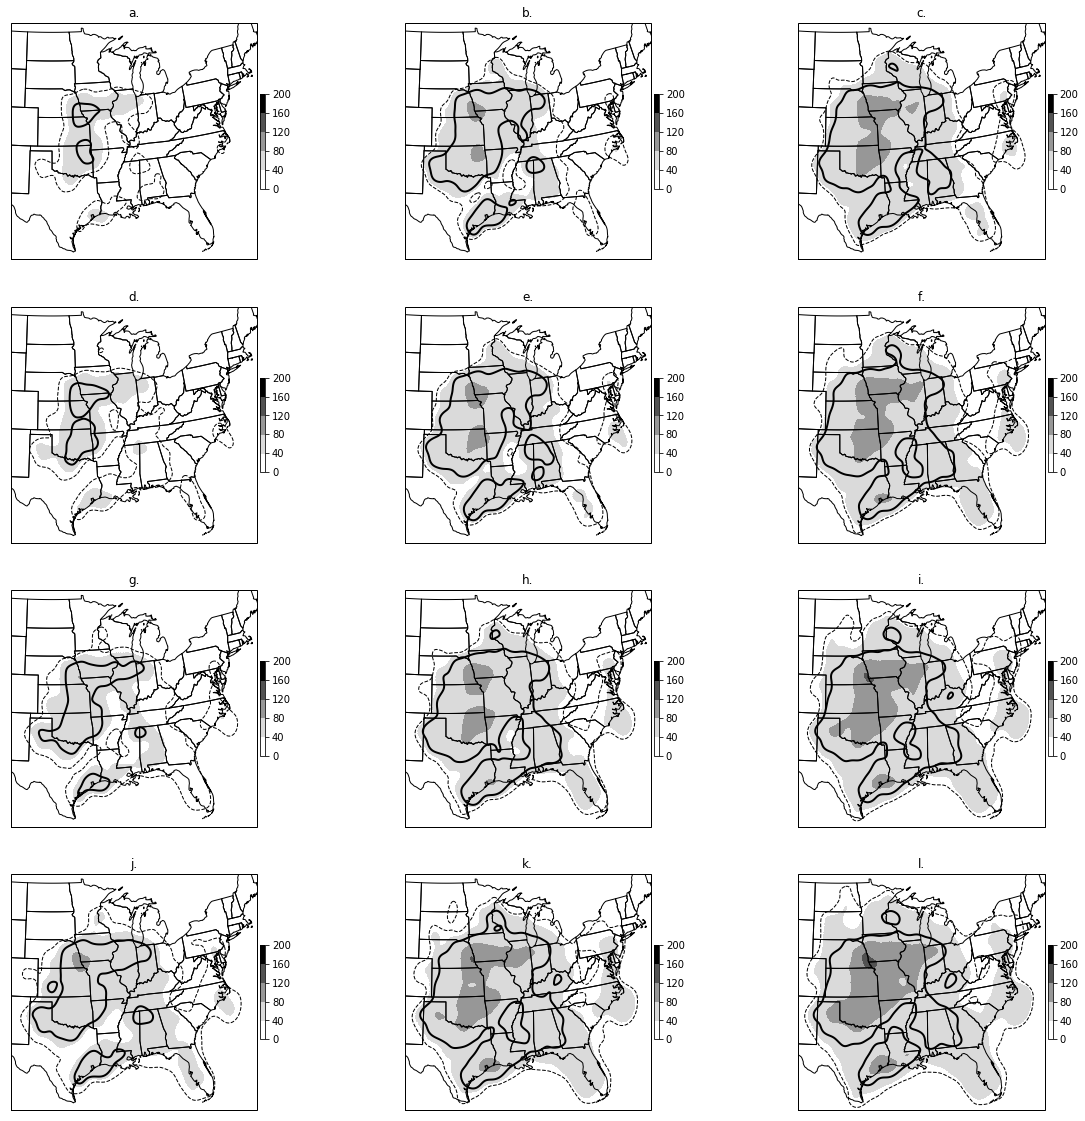

In [21]:
import pickle
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from mcs.utils.mapping_help import get_NOWrad_conus_lon_lat
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from string import ascii_lowercase

import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 20

from_proj = ccrs.PlateCarree()
to_proj = ccrs.AlbersEqualArea(central_longitude=-100.0000, central_latitude=38.0000)

lons, lats = get_NOWrad_conus_lon_lat()

lons, lats = np.meshgrid(lons, lats)

splot = 1

year = 2015

data_dir = "../data/slice_data/occurrence_maps/"

for crsr in [6, 12, 24, 48]:
    for ssr in [48, 96, 192]:
        
        ax = plt.subplot(4, 3, splot, projection=to_proj)
        ax.set_extent([-105, -75, 25, 48])
        shapename = 'admin_1_states_provinces_lakes_shp'
        states_shp = shpreader.natural_earth(resolution='50m',
                                             category='cultural', name=shapename)

        for state, info in zip(shpreader.Reader(states_shp).geometries(), 
                               shpreader.Reader(states_shp).records()):
            if info.attributes['admin'] == 'United States of America':

                ax.add_geometries([state], ccrs.PlateCarree(),
                                  facecolor='None', edgecolor='k')
        
        pdict = {'p0.00':None, 'p0.50': None, 'p0.90': None, 'p0.95': None}
        
        for p, ps in zip([0.0, 0.5, 0.9, 0.95], ['0.00', '0.50', '0.90', '0.95']):
            
            fn = str(year) + "_" + str(crsr).zfill(2) + "_" + str(ssr) + "_p" + str(100*p) + ".pkl"
            prom = pickle.load(open( data_dir + str(year) + "/" + fn, "rb"))

            pdict["p" + ps] = prom

        cmap = plt.cm.Greys
        classes = list(range(0, 225, 40))
        norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

        #Since each count is a 15 minute window, divide by 4 to get number of hours
        m50_ = gaussian_filter(pdict['p0.50']/4, 30)

        mmp = ax.pcolormesh(lons, lats, m50_, transform=from_proj, norm=norm, cmap=cmap)
        
        plt.colorbar(mmp, ax=ax, shrink=0.4, pad=0.01)

        m0_ = gaussian_filter(pdict['p0.00']/4, 30)
        m95_ = gaussian_filter(pdict['p0.95']/4, 30)

        l1 = ax.contour(lons, lats, m0_, levels=[40], colors=['k',], 
                          transform=from_proj, linestyles='dashed', linewidths=1)

        l3 = ax.contour(lons, lats, m95_, levels=[40], colors=['k',], 
                          transform=from_proj, linewidths=2)
        
        ax.set_title(ascii_lowercase[splot-1] + ".")
        
        splot += 1


Spatial occurrence (hours, shaded) of slices with an MCS probability of 0.5 or higher in 2015 
during the months of May through September for varying convective region and stratiform search radii.  The solid line denotes the 40-hour isopleth for slices with an MCS probability of 0.95 or higher, and the dotted line denotes the 40-hour isopleth for all qualifying slices.  The convective region search radii (CRSR) are: 6 km (a, b, c), 12 km (d, e, f), 24 km (g, h, i), and 48 km (j, k, l).  The stratiform search radii (SSR) are: 48 km (a, d, g, j), 96 km (b, e, h, k), and 192 km (c, f, i, l).

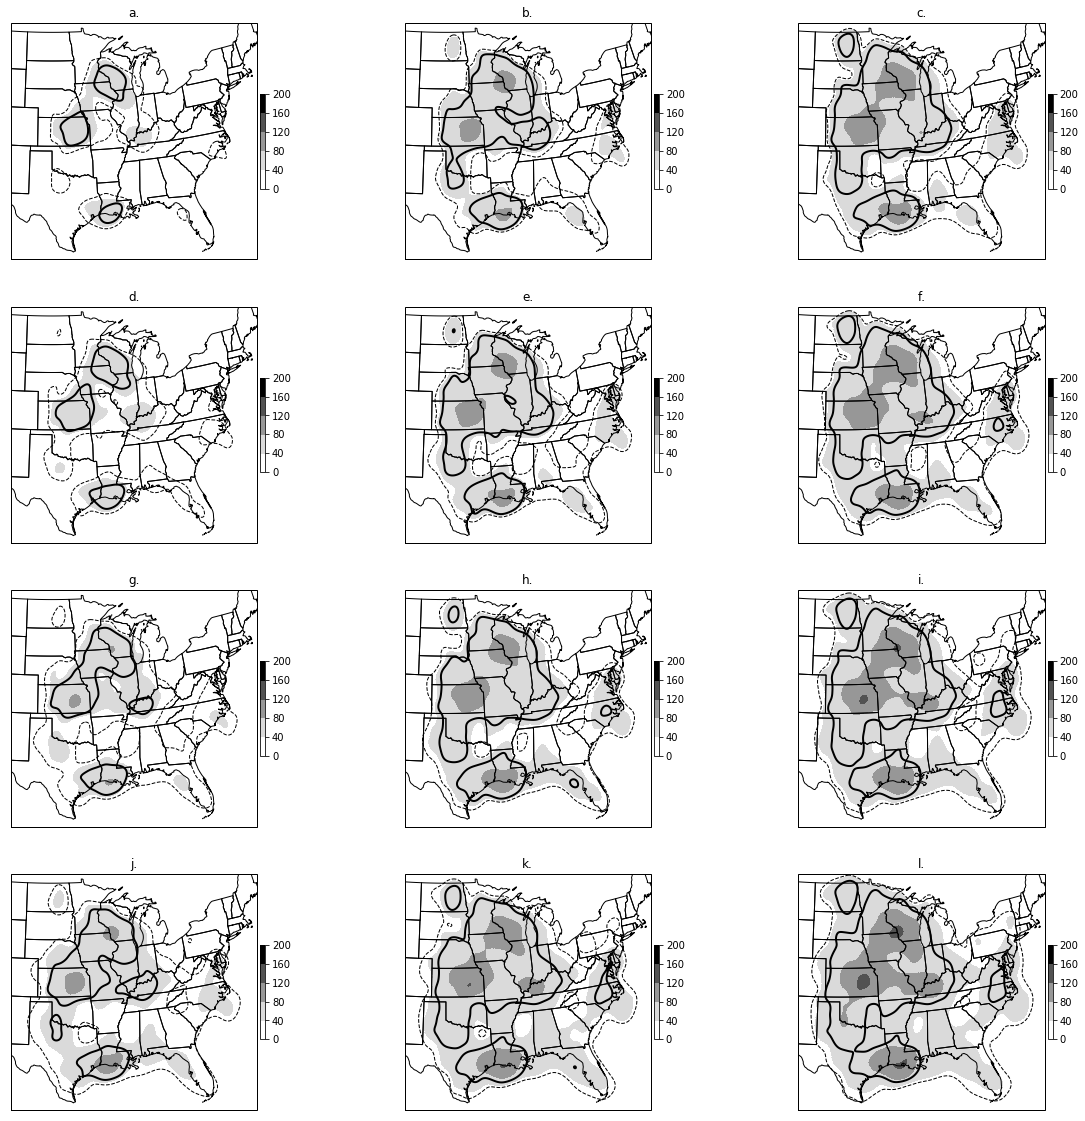

In [22]:
import pickle
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from mcs.utils.mapping_help import get_NOWrad_conus_lon_lat
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from string import ascii_lowercase

import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 20

from_proj = ccrs.PlateCarree()
to_proj = ccrs.AlbersEqualArea(central_longitude=-100.0000, central_latitude=38.0000)

lons, lats = get_NOWrad_conus_lon_lat()

lons, lats = np.meshgrid(lons, lats)

splot = 1

year = 2016

data_dir = "../data/slice_data/occurrence_maps/"

for crsr in [6, 12, 24, 48]:
    for ssr in [48, 96, 192]:
        
        ax = plt.subplot(4, 3, splot, projection=to_proj)
        ax.set_extent([-105, -75, 25, 48])
        shapename = 'admin_1_states_provinces_lakes_shp'
        states_shp = shpreader.natural_earth(resolution='50m',
                                             category='cultural', name=shapename)

        for state, info in zip(shpreader.Reader(states_shp).geometries(), 
                               shpreader.Reader(states_shp).records()):
            if info.attributes['admin'] == 'United States of America':

                ax.add_geometries([state], ccrs.PlateCarree(),
                                  facecolor='None', edgecolor='k')
        
        pdict = {'p0.00':None, 'p0.50': None, 'p0.90': None, 'p0.95': None}
        
        for p, ps in zip([0.0, 0.5, 0.9, 0.95], ['0.00', '0.50', '0.90', '0.95']):
            
            fn = str(year) + "_" + str(crsr).zfill(2) + "_" + str(ssr) + "_p" + str(100*p) + ".pkl"
            prom = pickle.load(open( data_dir + str(year) + "/" + fn, "rb"))

            pdict["p" + ps] = prom

        cmap = plt.cm.Greys
        classes = list(range(0, 225, 40))
        norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

        #Since each count is a 15 minute window, divide by 4 to get number of hours
        m50_ = gaussian_filter(pdict['p0.50']/4, 30)

        mmp = ax.pcolormesh(lons, lats, m50_, transform=from_proj, norm=norm, cmap=cmap)
        
        plt.colorbar(mmp, ax=ax, shrink=0.4, pad=0.01)

        m0_ = gaussian_filter(pdict['p0.00']/4, 30)
        m95_ = gaussian_filter(pdict['p0.95']/4, 30)

        l1 = ax.contour(lons, lats, m0_, levels=[40], colors=['k',], 
                          transform=from_proj, linestyles='dashed', linewidths=1)

        l3 = ax.contour(lons, lats, m95_, levels=[40], colors=['k',], 
                          transform=from_proj, linewidths=2)
        
        ax.set_title(ascii_lowercase[splot-1] + ".")
        
        splot += 1


Spatial occurrence (hours, shaded) of slices with an MCS probability of 0.5 or higher in 2016 
during the months of May through September for varying convective region and stratiform search radii.  The solid line denotes the 40-hour isopleth for slices with an MCS probability of 0.95 or higher, and the dotted line denotes the 40-hour isopleth for all qualifying slices.  The convective region search radii (CRSR) are: 6 km (a, b, c), 12 km (d, e, f), 24 km (g, h, i), and 48 km (j, k, l).  The stratiform search radii (SSR) are: 48 km (a, d, g, j), 96 km (b, e, h, k), and 192 km (c, f, i, l).